# Stacked Area Graph

This Jupyter Notebook creates a stacked area graph that shows how many times certain publishers have been referred by the media or journalists over a given period of time.  This data is extracted from the post processed data file, which should be readily available as a dataframe after running the helper notebook.  **If you have not run the helper notebook, please run that first**.

---

## Constants

Modify the constants below in order for the visualization to focus on a different set of publishers or period of time.

In [1]:
AREA = ['A', 'B', 'C'] # Which publishers should we focus on?
BEGIN = 2010 # What is the starting period of time (inclusive)
END = 2020 # What is the ending period of time (inclusive)
TIME = [str(date) for date in range(BEGIN, END + 1)]
REFER = 'referring record id' # Column name for referring records
DOP = 'date of publication' # Column name for date of publication

---

## Code
The below cells contain the necessary code needed in order to generate the visualization.  If you want to observe the data, click [here](#Data).  If you want to skip to the visualization, click [here](#Visualization).

---

In [2]:
# Use the dataframe created in the helper notebook
%store -r dataframe
dataframe

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def record_number_of_references_each(df, time_interval, column_name, column_value):
    '''
    Record the number of references of sources with a specific characteristic
    (e.g., sources whose 'associated publisher' is 'Times of Israel')
    
    The time when a source was referred is recorded based on the date of 
    publication on which the referring article/tweet was published. 
    
    e.g., If a NYT article published in 2020 refers to a 
    Times of Israel article published in 2019, the referral is 
    counted for 2020, not 2019.
    
    Parameters
    --------
    df: pandas dataframe
        data read as pandas dataframe from the postprocessed .csv file
    time_interval: string
                   'month' or 'year'
    column_name: string
                 column name to focus on. e.g., 'associated publisher'
    column_value: string
                  column value for a specific source. e.g., 'Times of Israel'
                  
    Return
    --------
    date_dic: dictionary (key:time, value:the number of references)
    '''
    date_dic = {}
    
    # for each source in the area category
    for index, row in df.loc[df[column_name] == column_value].iterrows():
        # record the publication date of each referring article/tweet
        if row[REFER] and row[REFER] != "null":
            referring_record_ids = row[REFER]
            if type(referring_record_ids) is float:
                continue
            for referring_id_raw in referring_record_ids:
                referring_id = int(referring_id_raw)
                if time_interval == 'year':
                    try:
                        year = df.at[referring_id, DOP][:4]
                        if type(df.at[referring_id, DOP]) is str:
                            if type(year) is str:
                                if year not in date_dic:
                                    date_dic[year] = 1
                                else:
                                    date_dic[year] += 1
                    except KeyError:
                        print(f'KeyError handled for record {index} with key {referring_id}.')
                if time_interval == 'month':
                    try:
                        year_month = df.at[referring_id, DOP][:7]
                        if type(year_month) is str:
                            if year_month not in date_dic:
                                date_dic[year_month] = 1
                            else:
                                date_dic[year_month] += 1
                    except KeyError:
                        print(f'KeyError handled for record {index} with key {referring_id}.')
    return date_dic

In [4]:
def record_number_of_references(df, time_interval, time_list, column_name, area_list):
    '''
    Record the number of references of sources with specific characteristics
    (e.g., sources whose 'associated publisher' is 'Times of Israel',
    those whose 'associated publisher' is 'Palestine Chronicle',
    and those whose 'associated publisher' is 'Jerusalem Post')
    
    Parameters
    --------
    df: pandas dataframe
        data read as pandas dataframe from the postprocessed .csv file
    time_interval: string
                   'month' or 'year'
    column_name: string
                 column name to focus on. e.g., 'associate publisher'
    area_list: list
               a list of column value of interest
               e.g., ['Palestine Chronicle', 'Times of Israel', 'Jerusalem Post']
                  
    Return
    --------
    a pandas dataframe with time points (e.g., 2018, 2019, 2020) as indices and
    area names (e.g., 'Palestine Chronicle', 'Times of Israel', 'Jerusalem Post')
    as column labels
    '''
    data_all_area_list = []
    
    # for each area category
    for column_value in AREA:
        # date of reference for the area
        data_each_area = record_number_of_references_each(df, time_interval, column_name, column_value)
        data_each_area_list = []
        for time in TIME:
            if time in data_each_area:
                data_each_area_list.append(data_each_area[time])
            else:
                data_each_area_list.append(0)
        data_all_area_list.append(data_each_area_list)
        
    return pd.DataFrame(list(map(list, zip(*data_all_area_list))), index=TIME, columns=AREA) 

In [5]:
stack = record_number_of_references(dataframe, 'year', TIME, 'associated publisher', AREA)

---

## Data

The below cells showcases the pandas dataframe, which will be visualized by pyplot.

---

**The raw data in our dataframe:**

In [6]:
dataframe

,title,author,date of publication,plain text,type,citations,citation name,anchor text,referring record id,number of referrals,url,associated publisher,tags,name,like count,retweet count,reply count,quote count
id,,,,,,,,,,,,,,,,,,
1,demo,me,2023-06-20,This is a demo text,domain,[A],[A],NaN,[2],1,https://demo.com,A,"[Demo, Example]",A,NaN,NaN,NaN,NaN
2,demo,me,2023-06-21,Another demo text,domain,[A],[A],NaN,NaN,0,https://demo.com,A,"[Demo, Example]",A,NaN,NaN,NaN,NaN
3,demo,me,2022-02-23,Just text,domain,[B],[B],NaN,"[2, 4]",2,https://demo.com,B,"[Demo, Example]",B,NaN,NaN,NaN,NaN
4,demo,me,2012-03-01,Demo text,domain,[C],[C],NaN,NaN,0,https://demo.com,C,"[Demo, Example]",C,NaN,NaN,NaN,NaN
5,example,me,2013-09-16,Example text denoting an example,domain,[A],[A],NaN,[2],1,https://demo.com,A,"[Demo, Example]",A,NaN,NaN,NaN,NaN
6,demo,them,2018-11-30,Text,domain,[A],[A],NaN,NaN,0,https://demo.com,A,"[Demo, Example]",A,NaN,NaN,NaN,NaN
7,example,them,2016-03-12,A demo text,domain,[A],[A],NaN,[2],1,https://demo.com,A,"[Demo, Example]",A,NaN,NaN,NaN,NaN
8,demo,them,2019-01-06,Text that demonstrates,domain,[A],[A],NaN,NaN,0,https://demo.com,A,"[Demo, Example]",A,NaN,NaN,NaN,NaN
9,demo,me,2021-11-04,Demo text,domain,[A],[A],NaN,[2],1,https://demo.com,A,"[Demo, Example]",A,NaN,NaN,NaN,NaN


**The data for the stacked area diagram:**

In [7]:
stack

,A,B,C
2010,0,0,0
2011,0,0,0
2012,0,1,0
2013,0,0,0
2014,0,0,0
2015,0,0,0
2016,0,0,0
2017,0,0,0
2018,0,1,0
2019,0,0,0


---

## Visualization

To start the visualization, click on `Cell` and `Run All`.

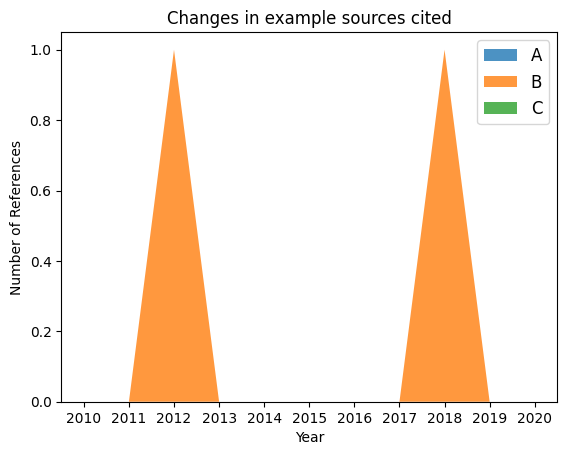

In [8]:
plt.stackplot(TIME,
              stack.transpose(),
              labels=AREA,
              alpha=0.8)

plt.legend(loc=0, fontsize='large')
plt.title("Changes in example sources cited")
plt.ylabel("Number of References")
plt.xlabel("Year")
plt.show()

---

## Exportation

The data file exported as .csv file below can be used to produce a stacked area graph or graphs of similar types with other libraries/languages/tools.  Uncomment the code below to enable the feature.

In [9]:
# stack.to_csv('stacked_area_data.csv')  